In [354]:
import numpy as np
import pandas as pd

from functools import reduce

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

import matplotlib.pyplot as plt

## Data Loading

Load all datasets. These may be varying in format, so we want to load and convert everything to one common format, in this case a single dataframe. 

In [355]:
DATA_PATH = 'data/'

datasets = []

#### Internet Usage Dataset

In [356]:
file_name = 'EU2019_internet_usage.csv'
internet_usage_df = pd.read_csv(f'{DATA_PATH}{file_name}', skiprows=1, header=None, names=['country', 'internet_usage'])
datasets.append(internet_usage_df)

print(internet_usage_df)

        country  internet_usage
0       Austria         87.7522
1       Belgium         90.2754
2      Bulgaria         67.9470
3        Cyprus         86.0636
4       Czechia         80.8669
5       Germany         88.1345
6       Denmark         98.0464
7         Spain         90.7187
8       Estonia         90.2289
9       Finland         89.6074
10       France         83.3397
11       Greece         75.6712
12      Croatia         79.0798
13      Hungary         80.3717
14      Ireland         87.0001
15        Italy         67.8507
16    Lithuania         81.5819
17   Luxembourg         97.1206
18       Latvia         86.1355
19        Malta         85.7786
20  Netherlands         93.2886
21       Poland         80.4359
22     Portugal         75.3464
23      Romania         73.6575
24     Slovenia         83.1084
25       Sweden         94.4934
26     Slovakia         82.8537


#### Average Age of Leaving Parental Home Dataset

In [357]:
file_name = 'EU2019_avg_age_of_leaving_parental_home.csv'
avg_age_leaving_home_df = pd.read_csv(f'{DATA_PATH}{file_name}', skiprows=1, header=None, names=['country', 'avg_age_leaving_home'])
datasets.append(avg_age_leaving_home_df)

print(avg_age_leaving_home_df)

        country  avg_age_leaving_home
0       Belgium                  25.2
1      Bulgaria                  30.0
2       Czechia                  25.8
3       Denmark                  21.1
4       Germany                  23.7
5       Estonia                  22.6
6       Ireland                  26.8
7        Greece                  28.9
8         Spain                  29.5
9        France                  23.6
10      Croatia                  31.8
11        Italy                  30.1
12       Cyprus                  27.1
13       Latvia                  26.6
14    Lithuania                  25.9
15   Luxembourg                  26.5
16      Hungary                  27.2
17        Malta                  29.3
18  Netherlands                  23.7
19      Austria                  25.4
20       Poland                  27.1
21     Portugal                  29.0
22      Romania                  28.1
23     Slovenia                  27.7
24     Slovakia                  30.9
25      Finl

#### Annual Sunshine Dataset

In [358]:
file_name = 'EU2019_Annual_Sunshine.csv'
annual_sunshine_df = pd.read_csv(f'{DATA_PATH}{file_name}', skiprows=1, header=None, names=['country', 'annual_sunshine'])
datasets.append(annual_sunshine_df)

print(annual_sunshine_df)

        country  annual_sunshine
0       Austria      1778.857143
1       Belgium      1489.600000
2      Bulgaria      2182.857143
3       Croatia      2196.700000
4        Cyprus      3313.800000
5       Denmark      1624.533333
6       Estonia      1789.000000
7       Finland      1664.440000
8        France      2107.750000
9       Germany      1631.263158
10       Greece      2652.387500
11      Hungary      1935.457143
12        Italy      2270.341176
13       Latvia      1721.250000
14    Lithuania      1733.250000
15   Luxembourg      1630.200000
16  Netherlands      1484.020000
17       Poland      1507.400000
18     Portugal      2453.916667
19      Romania      2034.236364
20     Slovakia      1779.066667
21     Slovenia      1712.100000
22        Spain      2519.886207
23       Sweden      1702.000000
24      Ireland      1424.255000
25        Malta      2660.000000
26      Czechia      1584.025000


#### Unemployment Rate Dataset

In [359]:
file_name = 'EU2019_unemployment_rate.csv'
unemployment_rate_df = pd.read_csv(f'{DATA_PATH}{file_name}', skiprows=1, header=None, names=['country', 'unemployment_rate'])
datasets.append(unemployment_rate_df)

print(unemployment_rate_df)

        country  unemployment_rate
0       Austria                4.8
1       Belgium                5.5
2      Bulgaria                5.2
3       Croatia                6.6
4        Cyprus                7.1
5       Czechia                2.0
6       Denmark                5.0
7       Estonia                4.5
8       Finland                6.8
9        France                8.4
10      Germany                3.0
11       Greece               17.9
12      Hungary                3.3
13      Ireland                5.0
14        Italy                9.9
15       Latvia                6.3
16    Lithuania                6.3
17   Luxembourg                5.6
18        Malta                4.1
19  Netherlands                4.4
20       Poland                3.3
21     Portugal                6.6
22      Romania                4.9
23     Slovenia                4.4
24     Slovakia                5.7
25        Spain               14.1
26       Sweden                6.9


#### Gini Index Dataset

In [360]:
file_name = 'EU2019_Gini_Index.csv'
gini_index_df = pd.read_csv(f'{DATA_PATH}{file_name}')[['Country Name', 'Gini Index 2019']].set_axis(['country', 'gini_index'], axis=1)
datasets.append(gini_index_df)

print(gini_index_df)

        country  gini_index
0       Austria        30.2
1       Belgium        27.2
2      Bulgaria        40.3
3        Cyprus        31.2
4       Czechia        25.3
5       Germany        31.8
6       Denmark        27.7
7         Spain        34.3
8       Estonia        30.8
9       Finland        27.7
10       France        31.2
11       Greece        33.1
12      Croatia        28.9
13      Hungary        30.0
14      Ireland        30.8
15        Italy        34.6
16    Lithuania        35.3
17   Luxembourg        34.2
18       Latvia        34.5
19        Malta        31.0
20  Netherlands        29.2
21       Poland        28.8
22     Portugal        32.8
23      Romania        34.8
24     Slovakia        23.2
25     Slovenia        24.4
26       Sweden        29.3


In [361]:
file_name = 'EU2019_religion_importance_weighted_scores.csv'
religion_importance_df = pd.read_csv(f'{DATA_PATH}{file_name}', skiprows=1, header=None, names=['country', 'religion_importance'])
datasets.append(religion_importance_df)

print(religion_importance_df)

        country  religion_importance
0       Belgium                 0.78
1      Bulgaria                 1.52
2       Czechia                 0.63
3       Denmark                 0.66
4       Germany                 0.73
5       Estonia                 0.67
6       Ireland                 0.96
7        Greece                 1.68
8         Spain                 0.96
9        France                 0.75
10      Croatia                 1.36
11        Italy                 1.43
12       Cyprus                 1.69
13       Latvia                 0.94
14    Lithuania                 1.09
15   Luxembourg                 0.61
16      Hungary                 0.91
17        Malta                 1.40
18  Netherlands                 0.71
19      Austria                 0.94
20       Poland                 1.39
21     Portugal                 1.38
22      Romania                 1.73
23     Slovenia                 0.78
24     Slovakia                 1.12
25      Finland                 0.81
2

#### Suicide Rate Dataset

In [362]:
file_name = 'EU2019_suicide_rates.csv'
suicide_rate_df = pd.read_csv(f'{DATA_PATH}{file_name}', skiprows=1, header=None, names=['country', 'suicide_rate'])
datasets.append(suicide_rate_df)

print(suicide_rate_df)

        country  suicide_rate
0       Ireland        9.6200
1        Greece        5.0900
2      Slovenia       19.7829
3        France       13.7586
4     Lithuania       26.1436
5        Poland       11.3017
6    Luxembourg       11.2655
7       Hungary       16.6483
8       Belgium       18.2944
9       Croatia       16.3697
10     Portugal       11.4600
11  Netherlands       11.8436
12      Austria       14.5966
13       Latvia       20.1248
14       Sweden       14.7410
15      Estonia       14.8911
16     Bulgaria        9.7300
17      Germany       12.3139
18        Spain        7.7200
19      Denmark       10.6956
20      Romania        9.7400
21     Slovakia       12.0899
22        Italy        6.6800
23      Finland       15.2946
24       Cyprus        3.6400
25        Malta        6.0600
26      Czechia       12.1774


### Combine datasets

In [363]:
data_df = reduce(lambda l, r: pd.merge(l, r, on='country', how='outer'), datasets)

print(data_df.shape)
print(data_df)

(27, 8)
        country  internet_usage  avg_age_leaving_home  annual_sunshine  \
0       Austria         87.7522                  25.4      1778.857143   
1       Belgium         90.2754                  25.2      1489.600000   
2      Bulgaria         67.9470                  30.0      2182.857143   
3       Croatia         79.0798                  31.8      2196.700000   
4        Cyprus         86.0636                  27.1      3313.800000   
5       Czechia         80.8669                  25.8      1584.025000   
6       Denmark         98.0464                  21.1      1624.533333   
7       Estonia         90.2289                  22.6      1789.000000   
8       Finland         89.6074                  21.8      1664.440000   
9        France         83.3397                  23.6      2107.750000   
10      Germany         88.1345                  23.7      1631.263158   
11       Greece         75.6712                  28.9      2652.387500   
12      Hungary         80.371

## Data Pre-Processing

#### Missing Data

In [364]:
countries_missing_data = data_df[(data_df.isna().any(axis=1))]

for index, row in countries_missing_data.iterrows():
    missing_columns = row.index[row.isna()].tolist()
    print(f'{row["country"]} is missing: {missing_columns}')

filtered_data_df = data_df[(data_df.notna().all(axis=1))]
print(data_df)
print(filtered_data_df)

        country  internet_usage  avg_age_leaving_home  annual_sunshine  \
0       Austria         87.7522                  25.4      1778.857143   
1       Belgium         90.2754                  25.2      1489.600000   
2      Bulgaria         67.9470                  30.0      2182.857143   
3       Croatia         79.0798                  31.8      2196.700000   
4        Cyprus         86.0636                  27.1      3313.800000   
5       Czechia         80.8669                  25.8      1584.025000   
6       Denmark         98.0464                  21.1      1624.533333   
7       Estonia         90.2289                  22.6      1789.000000   
8       Finland         89.6074                  21.8      1664.440000   
9        France         83.3397                  23.6      2107.750000   
10      Germany         88.1345                  23.7      1631.263158   
11       Greece         75.6712                  28.9      2652.387500   
12      Hungary         80.3717       

At this point, we also split the dataframe into two. One for attributes/features on which we want to perform clustering, and one for the target suicide rate. 

In [365]:
feature_df = filtered_data_df.drop(columns='suicide_rate')
label_df = filtered_data_df[['country', 'suicide_rate']]

print(feature_df)
print(label_df)

        country  internet_usage  avg_age_leaving_home  annual_sunshine  \
0       Austria         87.7522                  25.4      1778.857143   
1       Belgium         90.2754                  25.2      1489.600000   
2      Bulgaria         67.9470                  30.0      2182.857143   
3       Croatia         79.0798                  31.8      2196.700000   
4        Cyprus         86.0636                  27.1      3313.800000   
5       Czechia         80.8669                  25.8      1584.025000   
6       Denmark         98.0464                  21.1      1624.533333   
7       Estonia         90.2289                  22.6      1789.000000   
8       Finland         89.6074                  21.8      1664.440000   
9        France         83.3397                  23.6      2107.750000   
10      Germany         88.1345                  23.7      1631.263158   
11       Greece         75.6712                  28.9      2652.387500   
12      Hungary         80.3717       

#### Normalization

In [366]:
scaler = StandardScaler()

columns_to_scale = feature_df.drop(columns=['country']).columns
scaled_features = scaler.fit_transform(feature_df[columns_to_scale])
print(scaled_features.shape)

(27, 6)


In [367]:
# pca = PCA()

# principal_components = pca.fit_transform(scaled_features)
# print(pca.explained_variance_ratio_)
# print(pca.n_features_in_)
# print(pca.components_)

# pca = PCA(n_components=0.95)
# principal_components = pca.fit_transform(scaled_features)
# print(principal_components.shape)

In [368]:
# new_column_names = [f'PC_{n}' for n in range(principal_components.shape[1])] + ['suicide_rate']
# principal_data = pd.DataFrame(np.concatenate((principal_components, np.expand_dims(label_df['suicide_rate'].to_numpy(), 1)), axis=1), columns=new_column_names)
# print(principal_data)

# sns.pairplot(principal_data, hue='suicide_rate')

In [369]:
# tsne = TSNE(n_components=2, perplexity=10)

# embeddings_2d = tsne.fit_transform(principal_components)

# fig = plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1], c=label_df['suicide_rate'].to_numpy(), cmap='coolwarm')
# plt.colorbar(fig, label='Suicide Rate')

## Analysis

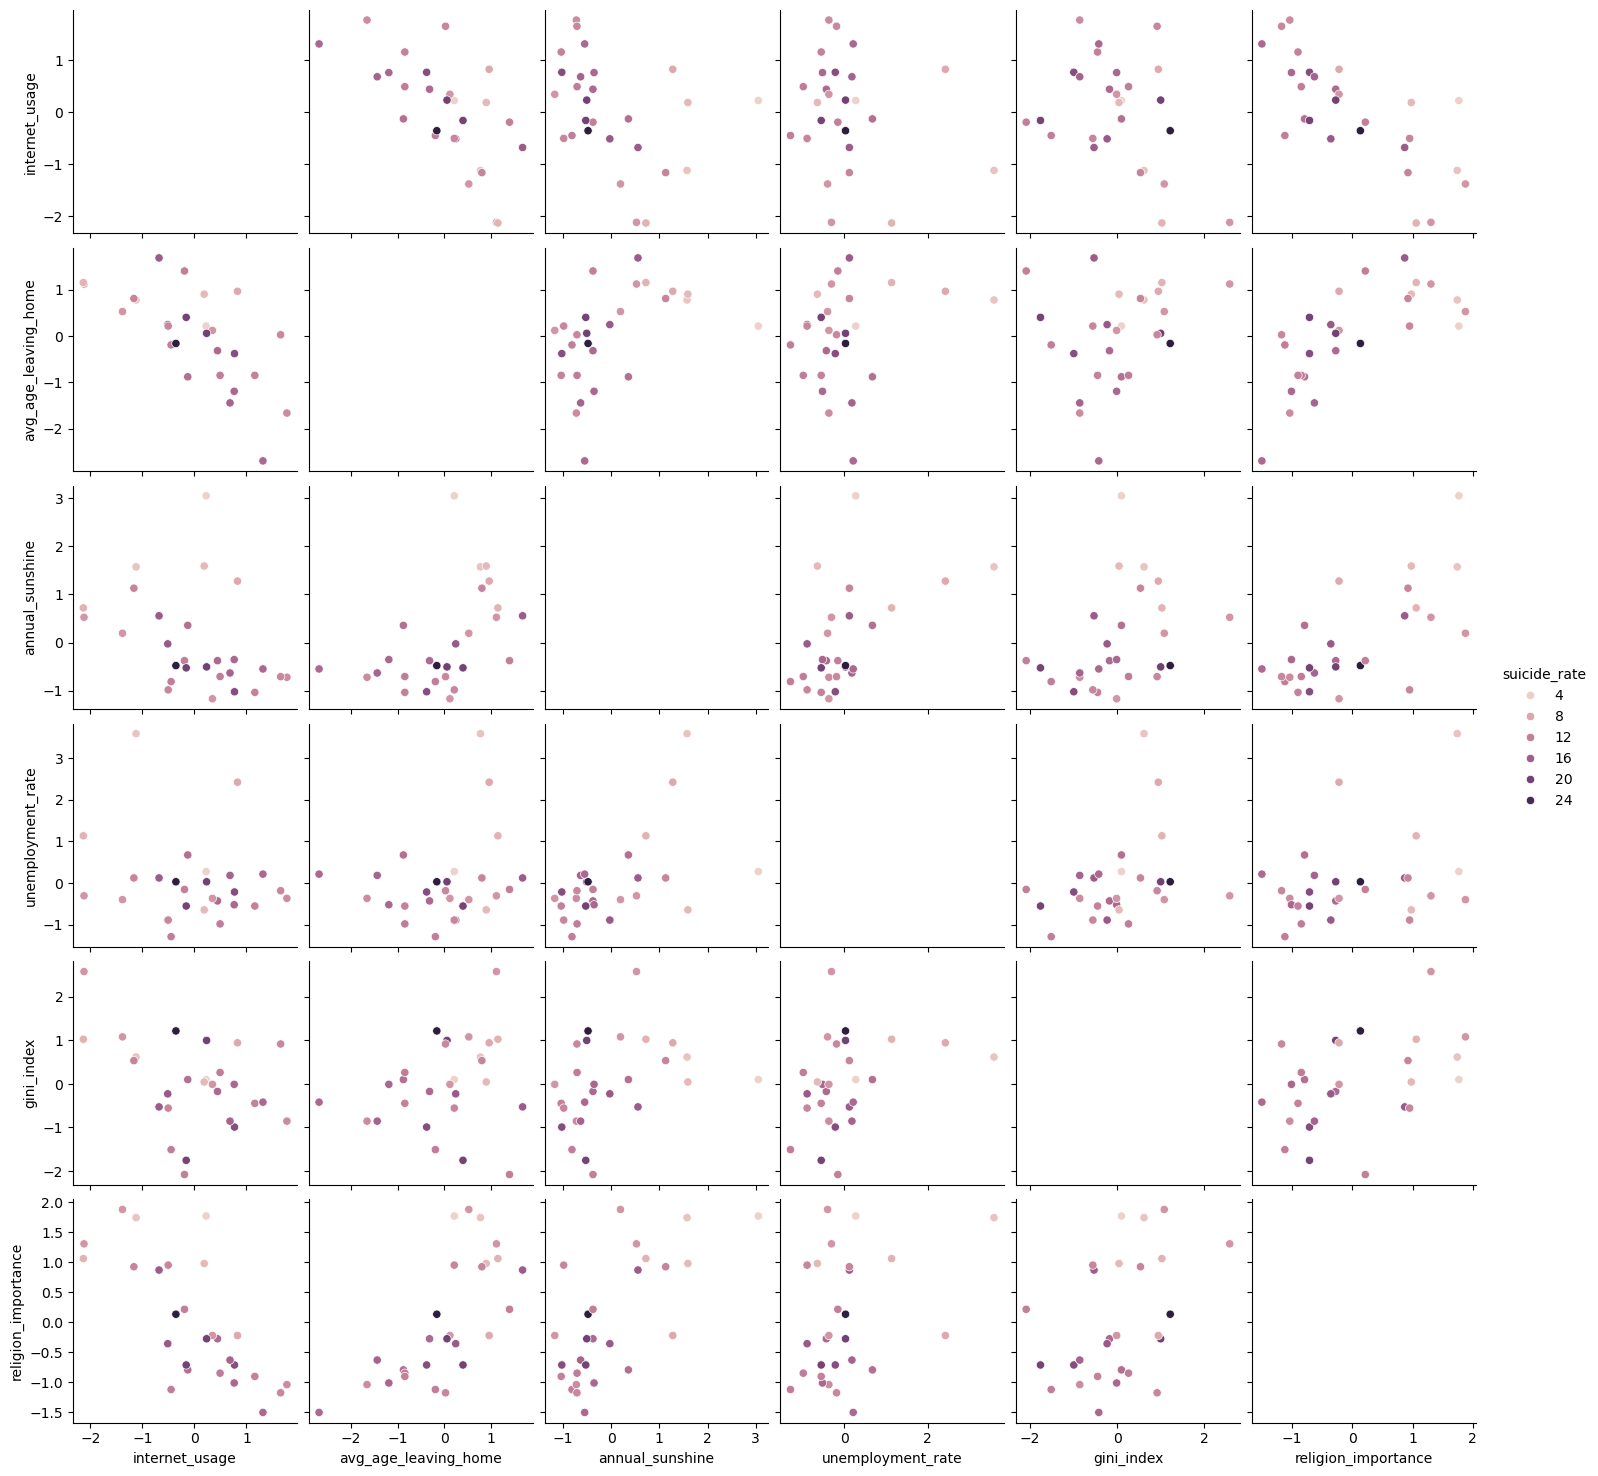

In [378]:
labels = label_df['suicide_rate'].to_numpy()

feature_column_names = list(feature_df.drop(columns=['country']).columns)

new_column_names = feature_column_names + ['suicide_rate']
scaled_data_df = pd.DataFrame(np.concatenate((scaled_features, np.expand_dims(labels, 1)), axis=1), columns=new_column_names)

sns.pairplot(scaled_data_df, hue='suicide_rate')

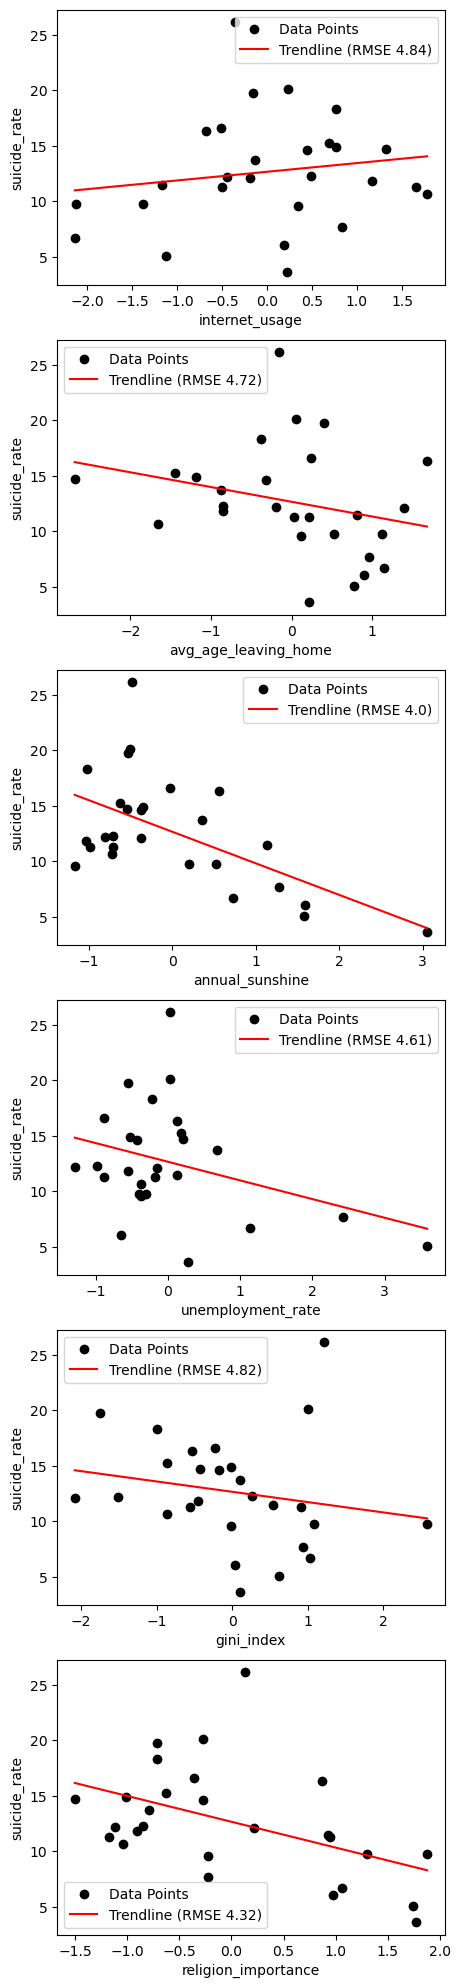

In [383]:
fig, axs = plt.subplots(scaled_features.shape[1], 1, figsize=(5,25))
for i, ax in enumerate(axs):
    feature = scaled_features[:,i]
    ax.scatter(feature, labels, c='k')
    ax.set_xlabel(feature_column_names[i])
    ax.set_ylabel('suicide_rate')

    slope, intercept = np.polyfit(feature, labels, 1)
    x_fit = np.linspace(min(feature), max(feature), 100)
    y_fit = slope * x_fit + intercept
    ax.plot(x_fit, y_fit, color='red', label='Trendline')

    predicted = slope * feature + intercept
    mse = np.mean((labels - predicted) ** 2)
    rmse = np.sqrt(mse)

    ax.legend(['Data Points', f'Trendline (RMSE {round(rmse, 2)})'])

plt.show()